In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [42]:
df=pd.read_csv('canada_rent.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [44]:
df.drop(['rentfaster_id' ,'link', 'availability_date', 'address','smoking', 'cats', 'dogs'], axis=1, inplace=True) 
df.drop(['city', 'type', 'furnishing'], axis=1, inplace=True) 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    25771 non-null  object 
 1   latitude    25771 non-null  float64
 2   longitude   25771 non-null  float64
 3   lease_term  25725 non-null  object 
 4   price       25771 non-null  float64
 5   beds        25639 non-null  object 
 6   baths       25637 non-null  object 
 7   sq_feet     21659 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.6+ MB


In [48]:
df.isnull().sum()

province         0
latitude         0
longitude        0
lease_term      46
price            0
beds           132
baths          134
sq_feet       4112
dtype: int64

In [50]:
df['beds'].unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds', nan,
       '6 Beds', 'none Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

In [52]:
df['baths'].unique()

array(['2.5', '1', '2', '1.5', '3.5', nan, '4', '3', '5', 'none', '4.5',
       '7.5', '5.5', '6', '6.5', '7', '8', '0'], dtype=object)

In [54]:
df['lease_term'].unique()

array(['Long Term', 'Negotiable', 'Short Term', '12 months', 'months',
       '6 months', nan], dtype=object)

In [56]:
#replacing values
df['beds'] = df['beds'].str.strip()  # Removes any extra spaces
df['beds'] = df['beds'].replace({'2 Beds': 2, '3 Beds': 3, 'Studio': 0, '1 Bed': 1, '5 Beds': 5, '4 Beds': 4, '6 Beds': 6, 'none Beds': 0, '8 Beds': 8,
    '7 Beds': 7, '9 Beds': 9 }).astype(float)



C:\Users\gurvi\AppData\Local\Temp\ipykernel_21244\378545954.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['beds'] = df['beds'].replace({'2 Beds': 2, '3 Beds': 3, 'Studio': 0, '1 Bed': 1, '5 Beds': 5, '4 Beds': 4, '6 Beds': 6, 'none Beds': 0, '8 Beds': 8,


In [58]:
df['baths'] = df['baths'].str.strip()
df['baths'] = df['baths'].replace({'2.5':2.5, '1':1, '2':2, '1.5':1.5, '3.5':3.5,  '4':4, '3':3, '5':5, 'none':0, '4.5':4.5,
      '7.5':7.5, '5.5':5.5, '6':6, '6.5':6.5, '7':7, '8':8, '0':0}).astype(float)

C:\Users\gurvi\AppData\Local\Temp\ipykernel_21244\3437255635.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['baths'] = df['baths'].replace({'2.5':2.5, '1':1, '2':2, '1.5':1.5, '3.5':3.5,  '4':4, '3':3, '5':5, 'none':0, '4.5':4.5,


In [60]:
# group lease terms in 3 categories : Short Term, Long Term, Negotiable

for index,row in df.iterrows():
    if row['lease_term']=='12 months':
        df.at[index,'lease_term']='Long Term'
    elif row['lease_term']=='6 months':
        df.at[index,'lease_term']='Short Term'
    elif row['lease_term']=='months':
        df.at[index,'lease_term']='Negotiable'
    


In [62]:
df.groupby('lease_term')
df['lease_term'].value_counts()

lease_term
Long Term     23873
Negotiable     1500
Short Term      352
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    25771 non-null  object 
 1   latitude    25771 non-null  float64
 2   longitude   25771 non-null  float64
 3   lease_term  25725 non-null  object 
 4   price       25771 non-null  float64
 5   beds        25639 non-null  float64
 6   baths       25637 non-null  float64
 7   sq_feet     21659 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.6+ MB


In [66]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['latitude', 'longitude', 'price', 'beds', 'baths'], dtype='object')

In [68]:
cat_features=df.select_dtypes(include=[object])
cat_features.columns

Index(['province', 'lease_term', 'sq_feet'], dtype='object')

In [70]:
correlation=numeric_features.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price        1.000000
baths        0.484878
beds         0.425508
longitude    0.109689
latitude    -0.214687
Name: price, dtype: float64 



In [72]:
# from above correlation matrix, we can observe that longitude and latitude are least correlated to price of house, 
#so we can drop this two columns as well
df.drop(['longitude', 'latitude'], axis=1, inplace=True)


# Outlier detection and treatment

<Axes: xlabel='price'>

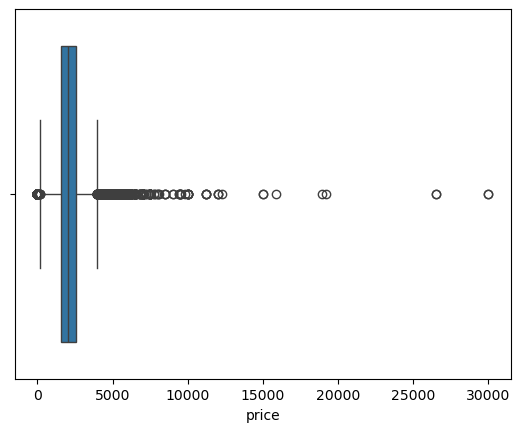

In [75]:
sns.boxplot(x=df['price'])

## there are many outliers but all outliers canot be removed
If too many outliers are removed, it might introduce bias and model might only be accurate for a narrow price range and fail miserably on any unusual property. Expanding the interquartile range (IQR) threshold when detecting outliers can help retain more data.
for that we will use a less strict multiplier on the IQR, such as 2.5 or 3 instead of the traditional 1.5 to target only extreme outliers without losing important variability.

In [78]:
first_quartile=df['price'].quantile(.25)
third_quartile=df['price'].quantile(.75)
IQR=third_quartile-first_quartile

new_upper_bound = third_quartile + 2.5*IQR
new_lower_bound = first_quartile - 1.5*IQR

print("original range", first_quartile, third_quartile)
print("modified range",new_lower_bound, new_upper_bound)

original range 1600.0 2550.0
modified range 175.0 4925.0


In [80]:
df.drop(df[df['price']>new_upper_bound].index, axis=0, inplace=True)
df.drop(df[df['price']<new_lower_bound].index, axis=0, inplace=True)

<Axes: xlabel='price'>

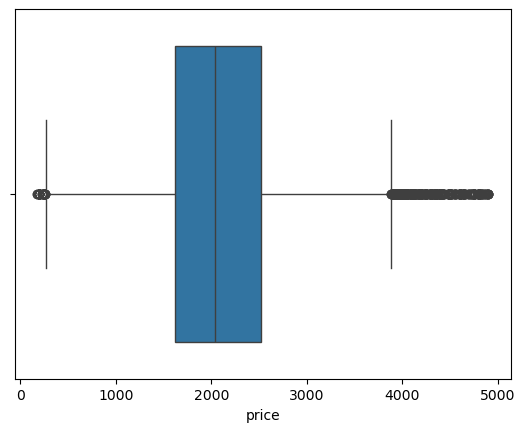

In [82]:
sns.boxplot(x=df['price'])

# Handle missing values:

In [85]:

#fill numeric columns with median values ( median is less sensitive to outliers), 
# and categorical columns with mode (frequently occured)

from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with mean strategy for numerical column (age) and most_frequent for categorical column (embark_town)
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Apply imputation
df['beds'] = imputer_num.fit_transform(df[['beds']])

df['baths']= imputer_num.fit_transform(df[['baths']])



In [87]:
df['sq_feet'] = imputer_cat.fit_transform(df[['sq_feet']]).ravel()
df['sq_feet'].isnull().sum()

0

In [89]:
# since Long Term is the most common term, the nulls were replaced by Long Term
df['lease_term'].fillna('Long Term',inplace=True)
df['lease_term'].isnull().sum()

C:\Users\gurvi\AppData\Local\Temp\ipykernel_21244\1510695775.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lease_term'].fillna('Long Term',inplace=True)


0

In [91]:
df.isnull().sum()

province      0
lease_term    0
price         0
beds          0
baths         0
sq_feet       0
dtype: int64

In [93]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)

# Encode the categorical 'sq_feet' feature
Sq_feet = LabelEncoder()
df['sq_feet'] = Sq_feet.fit_transform(df['sq_feet'])

Province=LabelEncoder()
df['province'] = Province.fit_transform(df['province'])

Lease_term=LabelEncoder()
df['lease_term'] = Lease_term.fit_transform(df['lease_term'])

df=df.dropna()


In [95]:
# Mapping encoded values back to original values
encoded_provinces = df['province'].unique()
decoded_provinces = Province.inverse_transform(encoded_provinces)

# Creating a dictionary for easy lookup
province_mapping = dict(zip(encoded_provinces, decoded_provinces))

print(province_mapping)

{0: 'Alberta', 1: 'British Columbia', 2: 'Manitoba', 3: 'New Brunswick', 4: 'Newfoundland and Labrador', 6: 'Nova Scotia', 5: 'Northwest Territories', 7: 'Ontario', 8: 'Quebec', 9: 'Saskatchewan'}


# Note: 0: 'Alberta', 1: 'British Columbia', 2: 'Manitoba', 3: 'New Brunswick', 4: 'Newfoundland and Labrador', 6: 'Nova Scotia', 5: 'Northwest Territories', 7: 'Ontario', 8: 'Quebec', 9: 'Saskatchewan'

In [98]:
df['province'].unique()

array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9])

In [100]:
# Mapping encoded values back to original values
encoded_sq_feet = df['sq_feet'].unique()
decoded_sq_feet = Sq_feet.inverse_transform(encoded_sq_feet)

# Creating a dictionary for easy lookup
sq_feet_mapping = dict(zip(encoded_sq_feet, decoded_sq_feet))

print(sq_feet_mapping)

{457: '1403', 537: '1496', 247: '1180', 409: '1351', 1022: '361 Sq. Ft.', 1203: '525 Sq. Ft.', 1542: '810 Sq. Ft.', 920: '265 Sq. Ft.', 1771: '997', 2: '0', 1651: '900', 604: '1600', 1294: '602', 1632: '886', 135: '1086', 330: '1265', 1368: '667', 1370: '669', 1382: '680', 1702: '939', 105: '1056', 1755: '983', 1756: '984', 1347: '650', 926: '2700', 402: '1341', 517: '1470', 1479: '757', 589: '1575', 528: '1488', 808: '2100', 454: '1400', 609: '1608', 36: '1000', 61: '1018', 1520: '792', 674: '1726', 663: '1704', 435: '1382', 850: '2300', 358: '1300', 689: '1750', 1407: '700', 315: '1250', 1408: '700 Sq. Ft.', 1229: '550', 25: '1,500+', 897: '2500', 1379: '677', 552: '1515', 779: '2000', 1308: '616', 1742: '971', 1354: '654', 1422: '711', 1663: '906', 418: '1361', 855: '2328', 540: '1500  above grade', 1611: '870', 1745: '974', 407: '1350', 84: '1038', 539: '1500', 832: '2193 + Walkout Basement', 636: '1650', 1770: '996', 1723: '955', 153: '1100', 378: '1316', 28: '1,600', 899: '2504',

In [102]:
df['sq_feet'].unique()

array([457, 537, 247, ..., 913, 943, 989])

In [104]:
# Mapping encoded values back to original values
encoded_lease_term = df['lease_term'].unique()
decoded_lease_term = Lease_term.inverse_transform(encoded_lease_term)

# Creating a dictionary for easy lookup
lease_term_mapping = dict(zip(encoded_lease_term, decoded_lease_term))

print(lease_term_mapping)

{0: 'Long Term', 1: 'Negotiable', 2: 'Short Term'}


In [106]:
df.head()

,province,lease_term,price,beds,baths,sq_feet
0,0,0,2495.0,2.0,2.5,457
1,0,0,2695.0,3.0,2.5,537
2,0,0,2295.0,2.0,2.5,247
3,0,0,2095.0,2.0,2.5,457
4,0,0,2495.0,2.0,2.5,457


In [108]:
df.isna().sum()

province      0
lease_term    0
price         0
beds          0
baths         0
sq_feet       0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25167 entries, 0 to 25770
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    25167 non-null  int32  
 1   lease_term  25167 non-null  int32  
 2   price       25167 non-null  float64
 3   beds        25167 non-null  float64
 4   baths       25167 non-null  float64
 5   sq_feet     25167 non-null  int32  
dtypes: float64(3), int32(3)
memory usage: 1.1 MB


# Multicollinearity check

In [113]:
corr_matrix = df.corr()
corr_matrix

,province,lease_term,price,beds,baths,sq_feet
province,1.000000,-0.192626,0.147091,-0.226284,-0.229673,0.128754
lease_term,-0.192626,1.000000,-0.037549,0.048163,0.031914,-0.091392
price,0.147091,-0.037549,1.000000,0.420112,0.490159,0.030177
beds,-0.226284,0.048163,0.420112,1.000000,0.656425,-0.231339
baths,-0.229673,0.031914,0.490159,0.656425,1.000000,-0.180681
sq_feet,0.128754,-0.091392,0.030177,-0.231339,-0.180681,1.000000


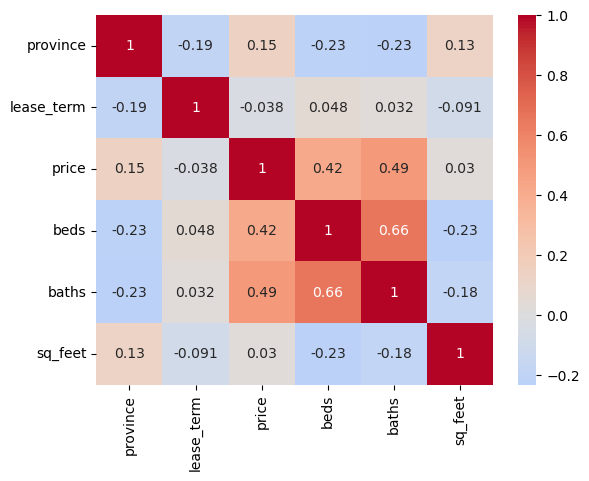

In [115]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

### Multicollinearity occurs when two or more independent variables are highly correlated, which can make it difficult for a regression model to estimate the relationship between each predictor and the dependent variable. We check for high correlation coefficients, typically above 0.7-0.8, which may indicate multicollinearity.

### Beds and Baths: Correlation = 0.668883. This is close to a problematic threshold but still under 0.7. While there is moderate correlation, it may not be severe enough to warrant immediate concern. 

# Splitting Data into Training and Testing Sets

In [119]:
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for models like linear regression and gradient boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [121]:
# Initialize models
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
gboost_reg = GradientBoostingRegressor(random_state=42)

# Train models and validate using 5-fold cross-validation
models = {
    'Linear Regression': linear_reg,
    'Random Forest': rf_reg,
    'Gradient Boosting': gboost_reg
}



In [123]:
model_results = []
model_names = []
model_mae = []
model_mse = []
model_r2 = []
model_coefs = []

for name, model in models.items():
    # Cross-validation scores for MSE (negated to make positive)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    
    # Mean RMSE from cross-validation
    rmse_scores = np.sqrt(-scores)
    mean_rmse = rmse_scores.mean()
    
    # Train the model and predict on the validation set
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate MAE, MSE, and R2 score
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save model performance metrics
    model_results.append(mean_rmse)
    model_names.append(name)
    model_mae.append(mae)
    model_mse.append(mse)
    model_r2.append(r2)
    
    
# Create DataFrame for results
df_results = pd.DataFrame({
    'Model': model_names,
    'RMSE': model_results,
    'MAE': model_mae,
    'MSE': model_mse,
    'R2': model_r2,
    
}).sort_values(by='RMSE', ascending=True)

# Print the results
print(df_results)

               Model        RMSE         MAE            MSE        R2
1      Random Forest  467.773169  318.183094  216030.899136  0.598067
2  Gradient Boosting  497.977988  377.292350  267122.647568  0.503009
0  Linear Regression  582.686285  444.278982  362058.346214  0.326378


### From above results, we can conclude that Random forest is best model among all three models with lowest error and highest R2 score, hence we will proceed with Random forest model.

### Prediction

In [157]:


final_model = models['Random Forest']  

# Train the final model on the entire training data
final_model.fit(X_train_scaled, y_train)

# Feature Importance for Random Forest
feature_importance = final_model.feature_importances_

# Create a DataFrame for better interpretation of feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,  # Make sure columns are named accordingly
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(features_df)



      Feature  Importance
3       baths    0.339811
4     sq_feet    0.334030
0    province    0.203052
2        beds    0.090560
1  lease_term    0.032547


In [153]:
# Generate predictions on the test set
y_test_pred = final_model.predict(X_test_scaled)

# Create a DataFrame to compare true and predicted values
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_test_pred
})

# Display the first few rows of true vs predicted values
print(comparison_df.head())

       True Values  Predicted Values
15613       1315.0       1502.320238
21356       1949.0       1925.838423
19848       3607.0       3635.651688
21465       2200.0       2249.812042
22599       1671.0       1681.353500


### Predictions can be improved with hypertunning.